In [13]:
import pandas as pd

csv_data = pd.read_csv('click_stream2.csv', names=['user_id', 'page', 'event_date', 'device'], parse_dates=['event_date'])
csv_data

,user_id,page,event_date,device
0,313593,1_home_page,2015-02-26,Desktop
1,468315,1_home_page,2015-02-21,Desktop
2,264005,1_home_page,2015-03-25,Desktop
3,290784,1_home_page,2015-03-14,Desktop
4,639104,1_home_page,2015-01-03,Desktop
...,...,...,...,...
142077,397473,4_payment_confirmation_page,2015-01-12,Mobile
142078,860829,4_payment_confirmation_page,2015-02-07,Mobile
142079,371291,4_payment_confirmation_page,2015-02-17,Mobile
142080,263707,4_payment_confirmation_page,2015-03-20,Mobile


In [15]:
# Группирую данные по месяцам, а внутри них по переходам на страницы
funnel_data = csv_data.groupby([pd.Grouper(key='event_date', freq='M'), 'page', 'device']).count()
funnel_data['user_percent']=0.0
funnel_data.columns = ['user_count', 'user_percent']
funnel_data

user_count  user_percent
event_date page                        device                           
2015-01-31 1_home_page                 Desktop       15050           0.0
                                       Mobile         7550           0.0
           2_search_page               Desktop        7529           0.0
                                       Mobile         6025           0.0
           3_payment_page              Desktop        1221           0.0
                                       Mobile         1169           0.0
           4_payment_confirmation_page Desktop          60           0.0
                                       Mobile          129           0.0
2015-02-28 1_home_page                 Desktop       15050           0.0
                                       Mobile         7550           0.0
           2_search_page               Desktop        7632           0.0
                                       Mobile         6055           0.0
           3_payment_page              Desktop        1191           0.0
                                       Mobile         1221           0.0
           4_payment_confirmation_page Desktop          54           0.0
                                       Mobile          119           0.0
2015-03-31 1_home_page                 Desktop       15050           0.0
                                       Mobile         7550           0.0
           2_search_page               Desktop        7370           0.0
                                       Mobile         1509           0.0
           3_payment_page              Desktop         296           0.0
                                       Mobile          335           0.0
           4_payment_confirmation_page Desktop          14           0.0
                                       Mobile           30           0.0
2015-04-30 1_home_page                 Desktop       15050           0.0
                                       Mobile         7550           0.0
           2_search_page               Desktop        7569           0.0
                                       Mobile         1511           0.0
           3_payment_page              Desktop         302           0.0
                                       Mobile          295           0.0
           4_payment_confirmation_page Desktop          22           0.0
                                       Mobile           24           0.0

In [83]:
# Перевожу абсолютные значения в процентные
dates_col = len(funnel_data.index.get_level_values(level=0).unique()) # кол-во диапазонов дат
page_col = len(funnel_data.index.get_level_values(level=1).unique()) # кол-во видов страниц
device_col = len(funnel_data.index.get_level_values(level=2).unique())

for i in range(0, dates_col): # цикл по датам
    for j in range(0, page_col): # цикл по страницам внутри даты
        for k in range(0, device_col): # цикл по видам устройств
            pos = i*page_col*device_col+j*device_col+k # номер текущего элемента
            base_pos = i*page_col*device_col+k # номер элемента, берущегося за 100% в данном диапазоне дат
            funnel_data.iloc[pos, 1] = round(funnel_data.iloc[pos, 0] / funnel_data.iloc[base_pos, 0]*100, 2)
#             print(i, j, k, pos, i*j*k, base_pos, funnel_data.iloc[pos, 0], funnel_data.iloc[base_pos, 0] )

print('Полученные данные для воронок по датам и типам устройств, в абсолютном и процентном соотношении')
print(funnel_data)

Полученные данные для воронок по датам и типам устройств, в абсолютном и процентном соотношении
                                                user_count  user_percent
event_date page                        device                           
2015-01-31 1_home_page                 Desktop       15050        100.00
                                       Mobile         7550        100.00
           2_search_page               Desktop        7529         50.03
                                       Mobile         6025         79.80
           3_payment_page              Desktop        1221          8.11
                                       Mobile         1169         15.48
           4_payment_confirmation_page Desktop          60          0.40
                                       Mobile          129          1.71
2015-02-28 1_home_page                 Desktop       15050        100.00
                                       Mobile         7550        100.00
           2_search_page    

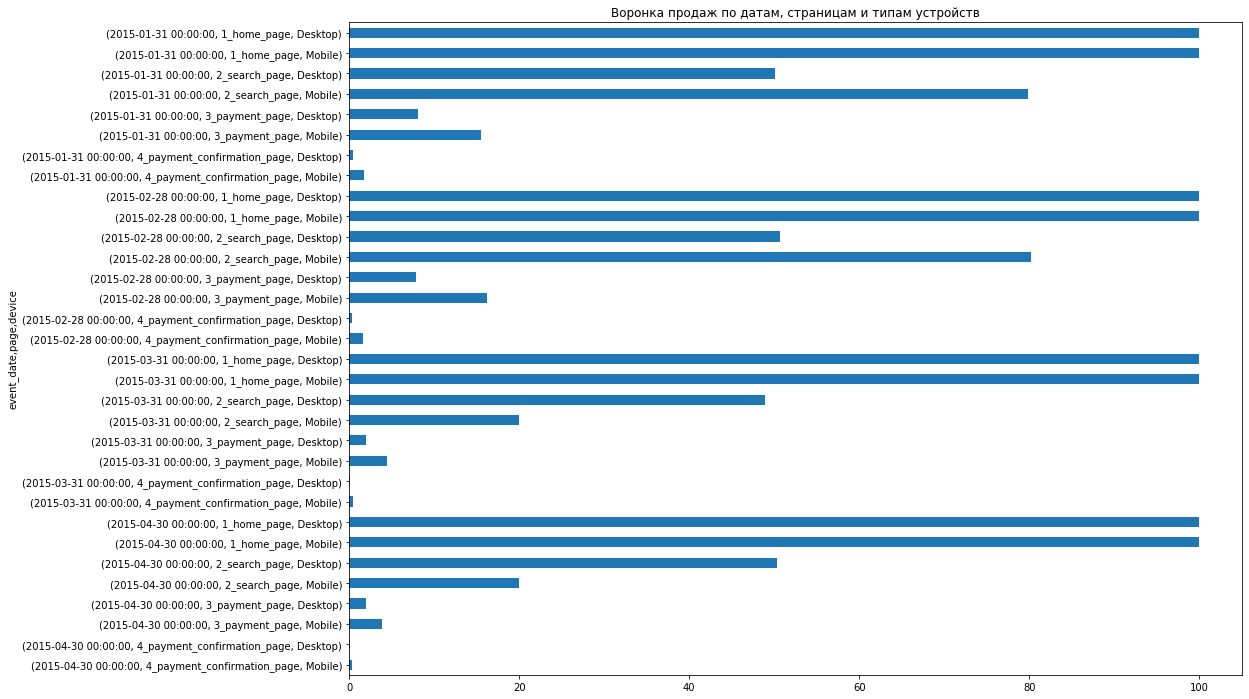

In [85]:
# Визуализируем данные
funnel_data.sort_index(level=[0,1], ascending=False).plot.barh(y='user_percent', figsize=(16,12), legend=False, 
                                                               title='Воронка продаж по датам, страницам и типам устройств');

Глядя на график, можно сделать вывод, что с марте резко упала эффективность привлечения клиентов на мобильных устройствах, в разделе "search_page"